## Exploratory Data Analysis

In [125]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [44]:
iris = pd.read_csv("iris.csv")

In [45]:
print(iris.shape)

(150, 6)


In [46]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [47]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

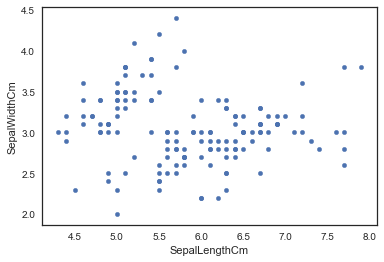

In [48]:
#2D scatter plot

iris.plot(kind='scatter', x = 'SepalLengthCm', y='SepalWidthCm');
plt.show()

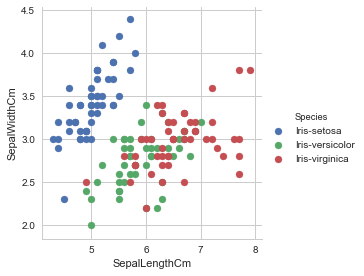

In [49]:
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue = "Species", size = 4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();
plt.show();

## Pair Plot

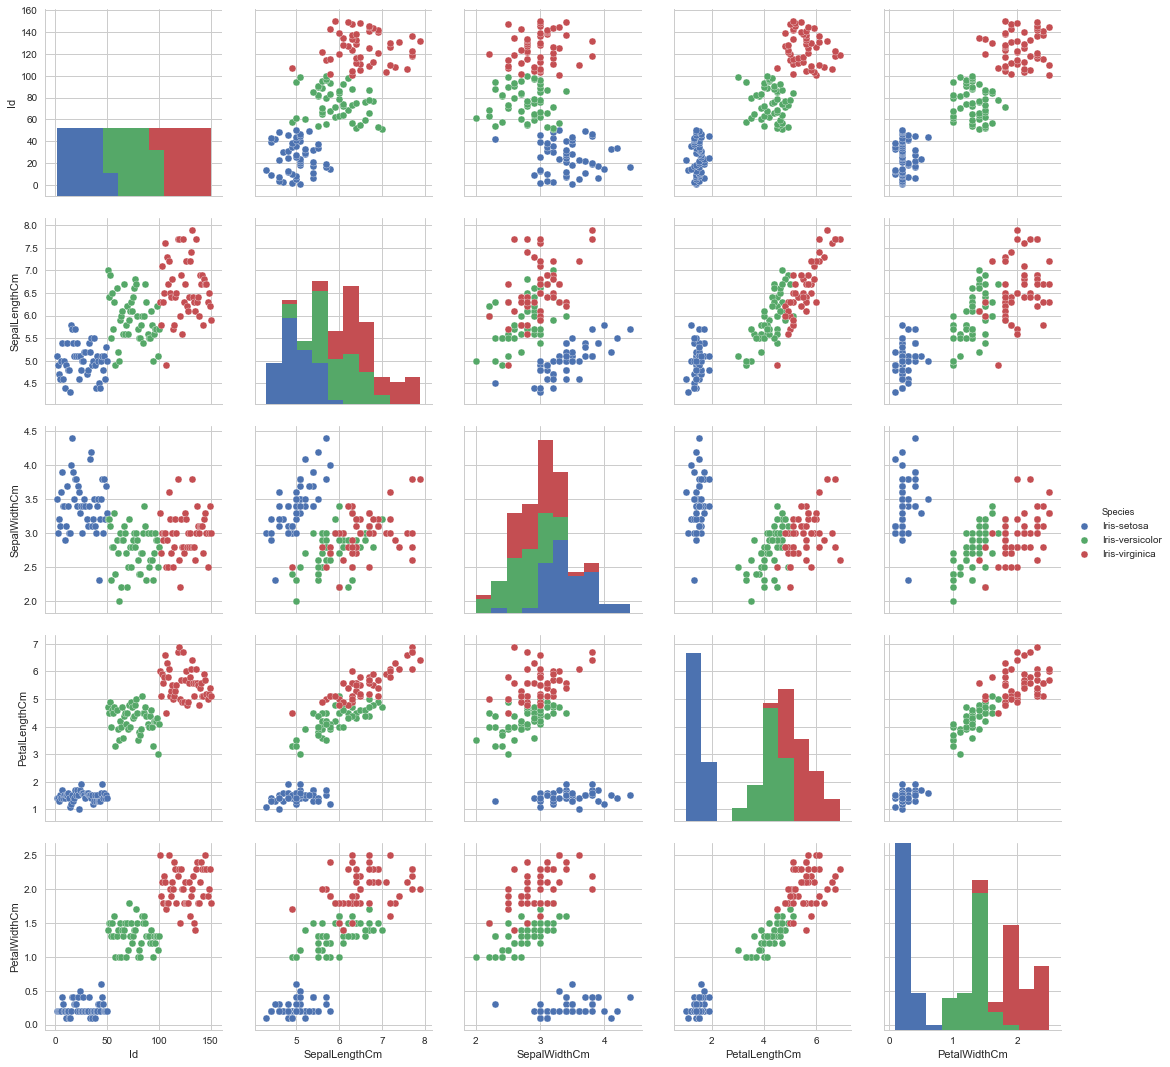

In [50]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="Species", size = 3);
plt.show()

## Histogram, PDF, CDF

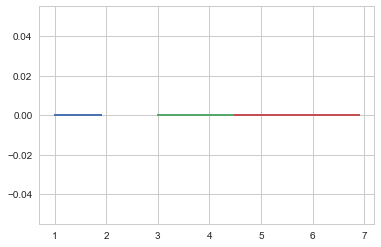

In [51]:
#1-D scatter plot of petal-length 
import numpy as np
iris_setosa = iris.loc[iris["Species"] == "Iris-setosa"];
Iris_versicolor = iris.loc[iris["Species"] == "Iris-versicolor"];
Iris_virginica = iris.loc[iris["Species"] == "Iris-virginica"];

plt.plot(iris_setosa["PetalLengthCm"], np.zeros_like(iris_setosa["PetalLengthCm"]))
plt.plot(Iris_versicolor["PetalLengthCm"], np.zeros_like(Iris_versicolor["PetalLengthCm"]))
plt.plot(Iris_virginica["PetalLengthCm"], np.zeros_like(Iris_virginica["PetalLengthCm"]))

#Univariate Analysis using PDF

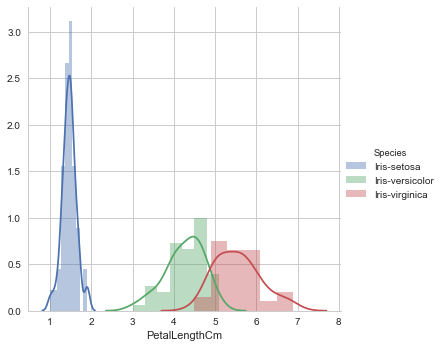

In [52]:
sns.FacetGrid(iris, hue="Species", size = 5) \
   .map(sns.distplot, "PetalLengthCm") \
   .add_legend();
plt.show();

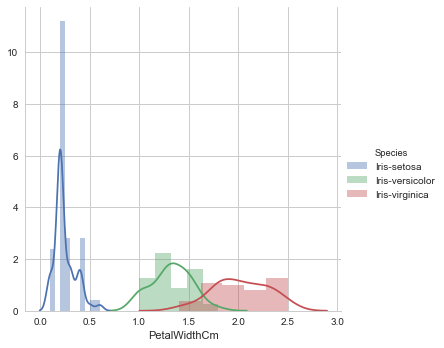

In [53]:
sns.FacetGrid(iris, hue="Species", size = 5) \
   .map(sns.distplot, "PetalWidthCm") \
   .add_legend();
plt.show();


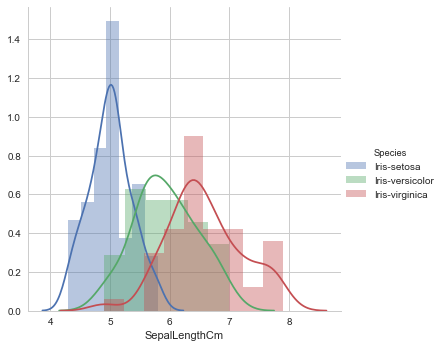

In [54]:
sns.FacetGrid(iris, hue="Species", size = 5) \
   .map(sns.distplot, "SepalLengthCm") \
   .add_legend();
plt.show();

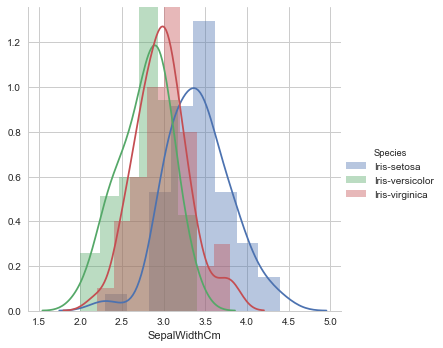

In [55]:
sns.FacetGrid(iris, hue="Species", size = 5) \
   .map(sns.distplot, "SepalWidthCm") \
   .add_legend();
plt.show();

PL > PW >> SL >> SW

## Cummulative Distribution Function

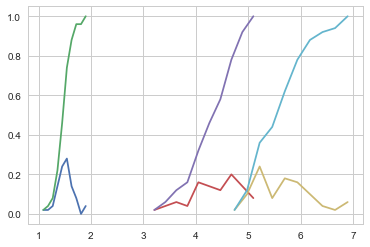

In [56]:
#Plotting CDF of Petal_length
counts, bin_edges = np.histogram(iris_setosa['PetalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Iris_versicolor['PetalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Iris_virginica['PetalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

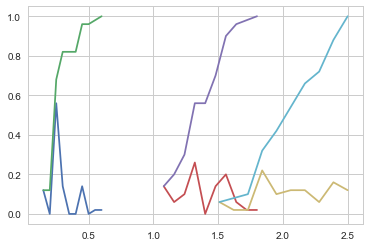

In [57]:
#Plotting CDF of Petal Width
counts, bin_edges = np.histogram(iris_setosa['PetalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Iris_versicolor['PetalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Iris_virginica['PetalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

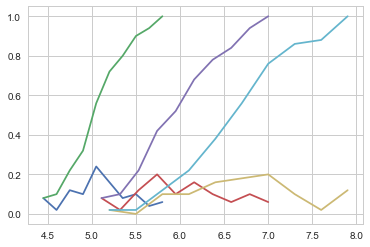

In [58]:
#Plotting CDF of Sepal_length
counts, bin_edges = np.histogram(iris_setosa['SepalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Iris_versicolor['SepalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Iris_virginica['SepalLengthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

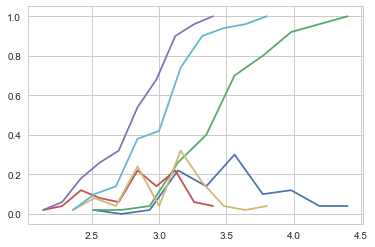

In [59]:
#Plotting CDF of Sepal_width
counts, bin_edges = np.histogram(iris_setosa['SepalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(Iris_versicolor['SepalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(Iris_virginica['SepalWidthCm'], bins = 10,
                                density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

 ## Box Plots, Violin plots and Multivariate probability density, contour plot.

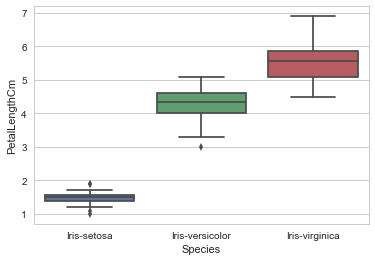

In [60]:
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.show();

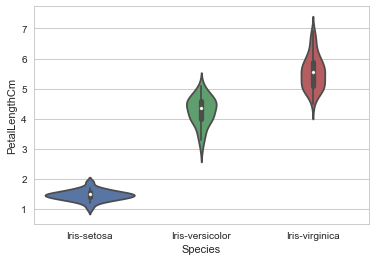

In [61]:
sns.violinplot(x='Species',y='PetalLengthCm',data=iris,size=10)
plt.show();

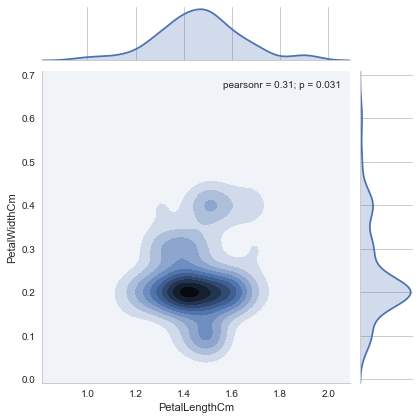

In [62]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=iris_setosa, kind="kde");
plt.show();

## Descriptive Satistics

In [63]:
print("Means:")
print(np.mean(iris_setosa["PetalLengthCm"]))

#Mean with an outlier.
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.mean(Iris_virginica["PetalLengthCm"]))
print(np.mean(Iris_versicolor["PetalLengthCm"]))

print("\nStd-dev:");
print(np.std(iris_setosa["PetalLengthCm"]))
print(np.std(Iris_virginica["PetalLengthCm"]))
print(np.std(Iris_versicolor["PetalLengthCm"]))

#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["PetalLengthCm"]))

#Median with an outlier
print(np.median(np.append(iris_setosa["PetalLengthCm"],50)));
print(np.median(Iris_virginica["PetalLengthCm"]))
print(np.median(Iris_versicolor["PetalLengthCm"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(Iris_virginica["PetalLengthCm"],np.arange(0, 100, 25)))
print(np.percentile(Iris_versicolor["PetalLengthCm"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["PetalLengthCm"],90))
print(np.percentile(Iris_virginica["PetalLengthCm"],90))
print(np.percentile(Iris_versicolor["PetalLengthCm"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["PetalLengthCm"]))
print(robust.mad(Iris_virginica["PetalLengthCm"]))
print(robust.mad(Iris_versicolor["PetalLengthCm"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204

Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


## Correlation visualization

In [64]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


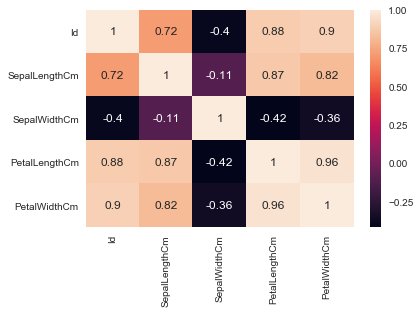

In [66]:
iris_corr_data = iris.corr()
ax = sns.heatmap(iris_corr_data,annot=True)

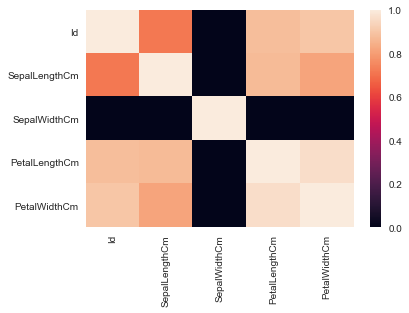

In [67]:
# color val lies between 0-1 i.e covariance val
ax = sns.heatmap(iris_corr_data, vmin=0, vmax=1)

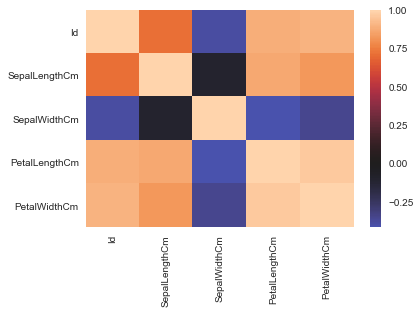

In [68]:
ax = sns.heatmap(iris_corr_data, center=0)

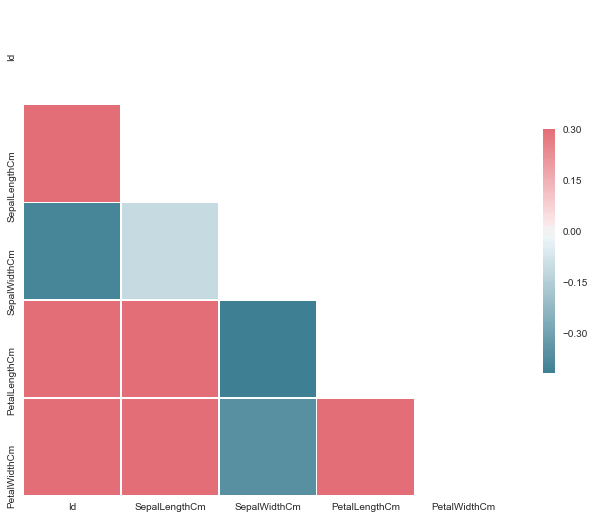

In [69]:
from string import ascii_letters

sns.set(style="white")

# Compute the correlation matrix
corr = iris.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Feature selection

Optimal number of features : 4


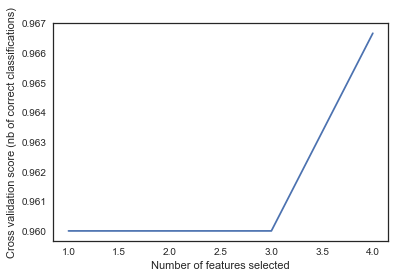

In [103]:
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(iris.iloc[:,1:5], iris.iloc[:,5])

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [107]:
svm = LinearSVC()
# create the RFE model for the svm classifier and select attributes
rfe = RFE(svm, 3)
rfe = rfe.fit(iris.iloc[:,1:5], iris.iloc[:,5])
# print summaries for the selection of attributes
print(iris.iloc[:,1:5].columns)
print(rfe.support_)
print(rfe.ranking_)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
[False  True  True  True]
[2 1 1 1]


In [115]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [116]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [117]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores

In [118]:
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

   Nearest Neighbors | Accuracy: 99.05% (+/- 3.81%)
          Linear SVM | Accuracy: 100.00% (+/- 0.00%)
             RBF SVM | Accuracy: 100.00% (+/- 0.00%)
    Gaussian Process | Accuracy: 100.00% (+/- 0.00%)
       Decision Tree | Accuracy: 100.00% (+/- 0.00%)
       Random Forest | Accuracy: 100.00% (+/- 0.00%)
          Neural Net | Accuracy: 38.44% (+/- 4.86%)
            AdaBoost | Accuracy: 100.00% (+/- 0.00%)
         Naive Bayes | Accuracy: 98.30% (+/- 4.17%)
                 QDA | Accuracy: 100.00% (+/- 0.00%)


In [126]:
from sklearn.grid_search import GridSearchCV

clf = SVC(kernel="linear")

# prepare a range of values to test
param_grid = [
  {'C': [.01, .1, 1, 10], 'kernel': ['linear']},
 ]

grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [120]:
# summarize the results of the grid search
print("Best score: %0.2f%%" % (100*grid.best_score_))
print("Best estimator for parameter C: %f" % (grid.best_estimator_.C))

Best score: 100.00%
Best estimator for parameter C: 0.100000


In [121]:
clf = SVC(kernel="linear", C=0.1)
clf.fit(X_train, y_train)
y_eval = clf.predict(X_test)

In [122]:
acc = sum(y_eval == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 100.00%


In [123]:
clf = SVC(kernel="linear", C=0.1)
scores_final = cross_val_score(clf, X, y, cv=5)

In [124]:
scores_final.mean(), scores_final.std()
print("Final model | Accuracy: %0.2f%% (+/- %0.2f%%)" % (100*scores_final.mean(), 100*scores_final.std() * 2))

Final model | Accuracy: 87.33% (+/- 31.10%)
